### Importing the required libraries for various operations:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
import random
import math
from scipy import stats
from IPython.display import Markdown, display

In [2]:
# to turn off the unnecessary warnings generated by pandas
pd.options.mode.chained_assignment = None  # default='warn'

# Print the following string in .md syntax
def printmd(string):
    display(Markdown(string))

### Weather dataset containing a month's weather data in which data is generated per hour

In [3]:
df=pd.read_csv('weatherHistory.csv')

# 1. Exploratory data analysis

## a. Description of dataset

### i. Displaying the whole dataset

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,0.0,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,0.0,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,0.0,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


 ### **ii. Description of dataset**

- This dataset consists of the weather records for a month taken with the observations being taken down and noted per hour.

- It consists of various aspects of weather like precipitation, humidity, wind speed, wind bearing, visibiliry, loud cover, pressure, temperature, apparent temperature against a particular instant of time.

- The summary and the daily summary are noted down appropriately as per the parameters collected.

- Most of the parameters are numerical with the remaining few being categorical.

- The objective of this project is to make optimum use of the dataset to extract maximum and most relevant information out of the dataset for various purposes.

- The first section of the project would consist of descriptive statistics while the second half would contain inferential statistics.

- With the help of the relationships generated between various variables, we can appropriately put this to a great use by inferring various parameters from it.

- While this is just a sample of 720 records, we can easily put this to a great use to infer about various weather parameters on the other given days with optimal accuracy and precision along with mininal margin of error.

### **iii. Meaning of columns in the dataset**

- **Formatted Date:** 
 Denotes the particular time instance

- **Summary:**
 Denotes the summary of the weather for that particular instance of time

- **Precip Type:**
 Indicates the type of precipitation (Categorical variable)

- **Temperature (C):**
 Denotes the absolute temperature in that period of time 

- **Apparent Temperature (C):** 
 Denotes the temperature perceived by humans in that period of time

- **Humidity:** 
 Denotes the humidity in that period of time

- **Wind Speed (km/h):** 
 Denotes the wind speed in that period of time

- **Wind Bearing (degrees):**
 Denotes the compass direction towards which an object is moving because of the wind

- **Visibility (km):**
 Denotes the greatest distance upto which an object can be seen clearly

- **Cloud Cover:**
 Refers to the fraction of the sky covered by the clouds 

- **Pressure (millibars):**
 Denotes the amount of pressure reading as displayed in the barometer

- **Daily Summary:**
 Displays the weather summary for the whole day by implementing appropriate statistical measures across the period of 24 hours

## b. Data cleaning

### i. Handling of missing data by dropping:

In [5]:
#Since the dataset has a column, all of whose values are null, we can drop it, in order to obtain the revised dataset
df1 = df.drop(columns = 'Loud Cover')
df1.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


### ii. Handling of missing data by imputing:

Imputing by interploation:

In [6]:
df.interpolate()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,0.0,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,0.0,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,0.0,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,0.0,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### iii. Handling via the best approach (if different from any of the methods mentioned above):

The best approach would be the combination of dropping (the reduntant columns) and interpolation (for appropriate numeric columns) for best results:

In [7]:
# note that df1 is the modified form of df0. Changes made: df1 is equivalent to dropping unnecessary and repetitive columns from df0
df1.interpolate()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


### iv. Reasons for the above operations

The main reasons for the above operations is for the sake of removal of unnecessary, unwanted and redundant values which could potentially affect the obtained results thereby making the presented data ineffecient and repetitive.

## c. Removal of unwanted observations (duplicate/irrelevant/repetitive)

In [8]:
df1.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,16.344444,16.344444,0.60,6.1502,40.0,16.1000,1022.16,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,15.788889,15.788889,0.62,6.1019,69.0,16.1000,1022.05,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,13.344444,13.344444,0.73,3.2522,56.0,15.1823,1021.85,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,12.611111,12.611111,0.75,3.2200,20.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,12.038889,12.038889,0.78,0.0000,0.0,16.1000,1021.84,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


## d. Fixing of typos and inconsistent capitalization

_______________________________________________________________________________________________________________________________

# 2. Graph visualization

## a. Visualization of dataset to extract meaningful insights

## b. Implementation of graph visualization techniques (any 3) (most suitable)

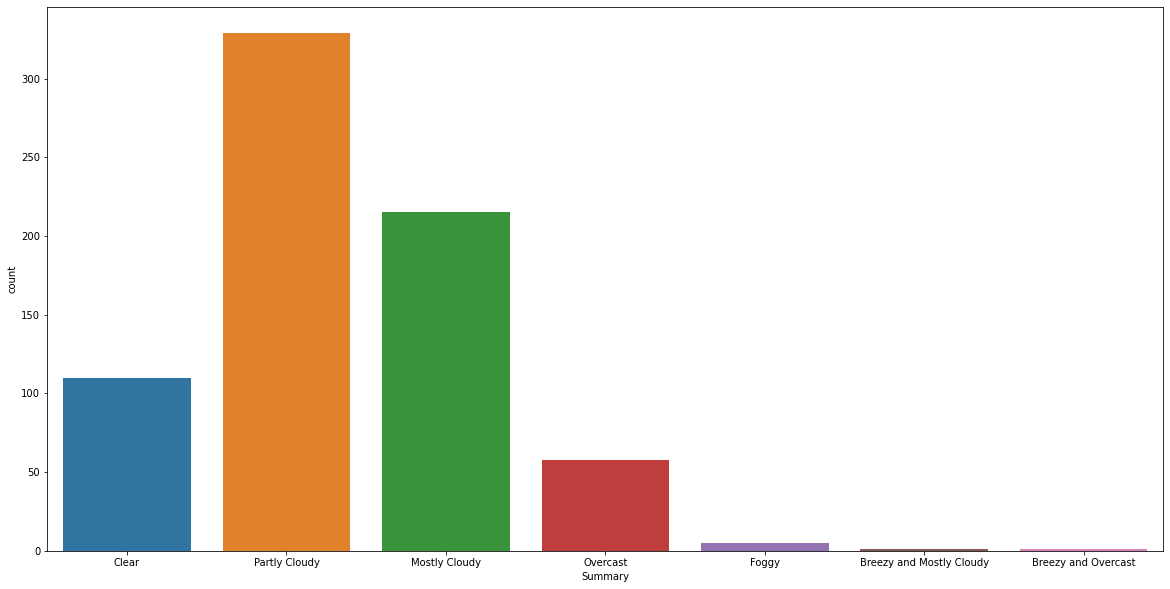

In [9]:
#number of hours for each summary category (in a month)

plt.figure(figsize = (20,10))
sns.countplot(df["Summary"])
plt.show()

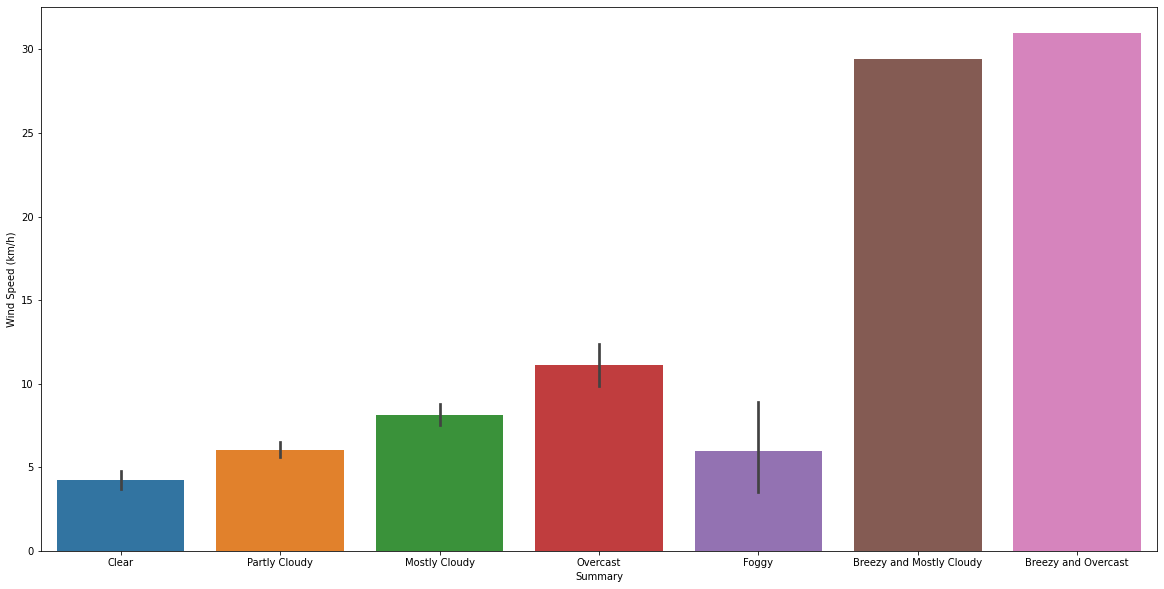

In [10]:
# effect of weather on wind speed
plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Wind Speed (km/h)"])
plt.show()

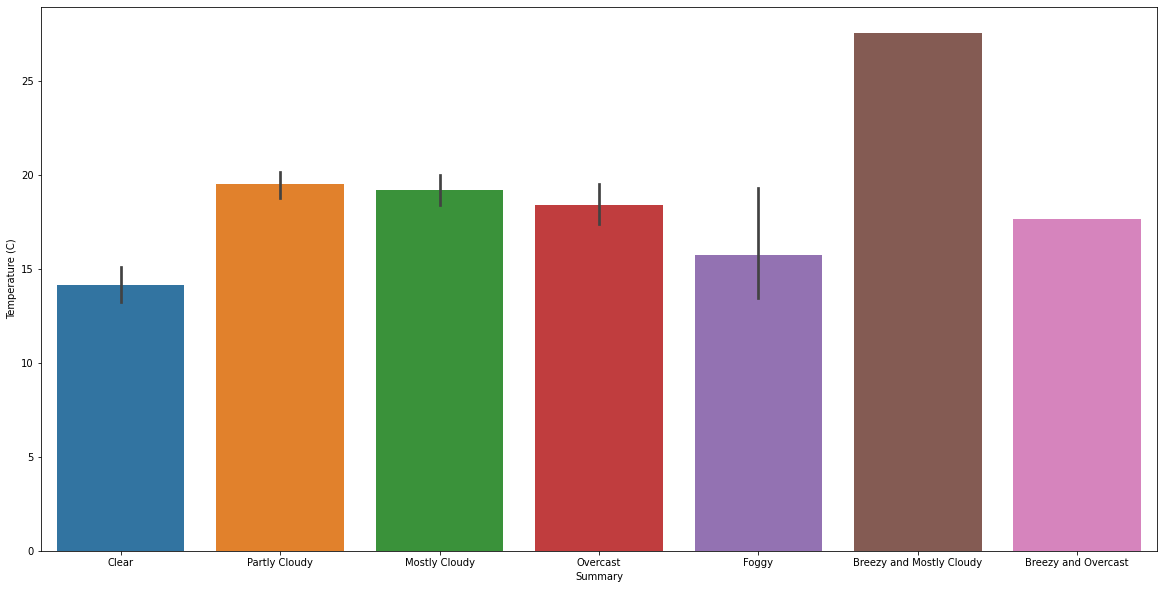

In [11]:
#effect of weather on temperature
plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Temperature (C)"])
plt.show()

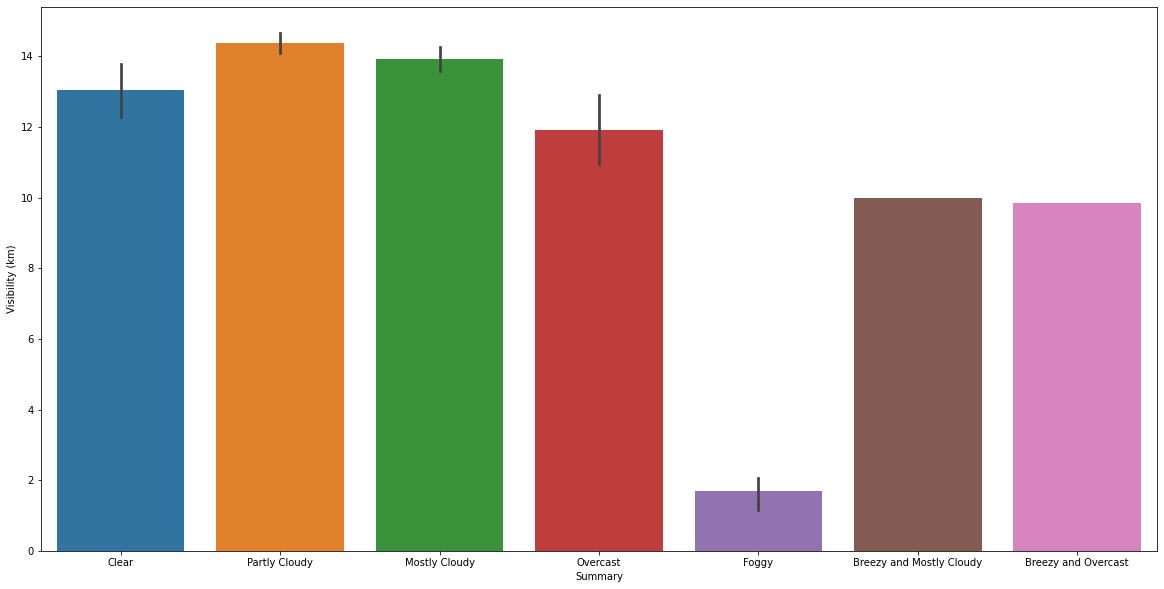

In [12]:
#effect of weather on visibility
plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Visibility (km)"])
plt.show()

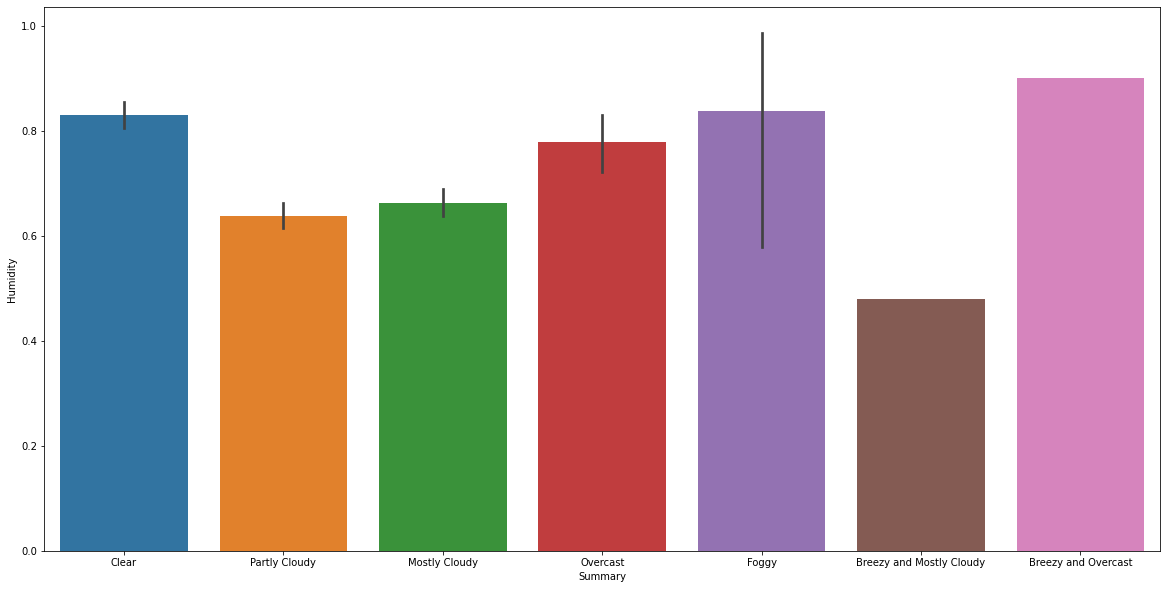

In [13]:
#effect of weather on humidity

plt.figure(figsize = (20,10))
sns.barplot(x = df["Summary"],y = df["Humidity"])
plt.show()

#### References

**Part-1**:

* **Pc** = Partly Cloudy
* **Mc** = Mostly Cloudy
* **F** = Foggy
* **O** = Overcast


**Part-2**:

* **sitm** = starting in the morning
* **sita** = starting in the afternoon
* **cun** = continuing till noon
* **cue** = continuing till evening

**Part-3**:

* **ttd** = throughout the day
* **so** = starting overnight
* **o** = overnight

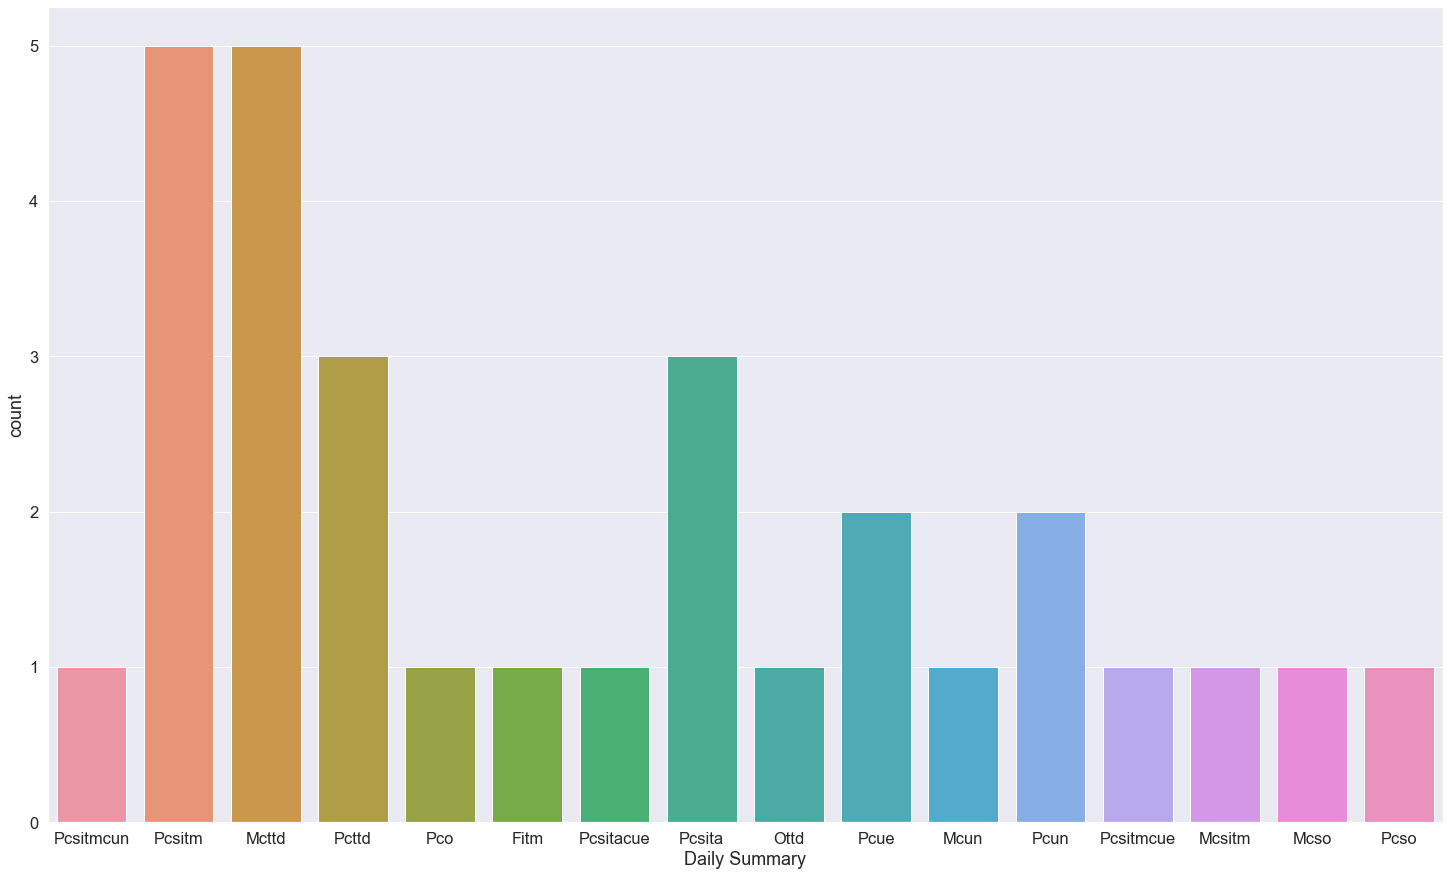

In [14]:
#count of daily weather summaries
days = [i for i in range(0,719,24)]
data_with_one_hour_per_day = df.iloc[days,:]

def shorten(text):
    if(text == 'NaN'):
        return text
    return("".join([i[0] for i in text.split(" ")]))

data_with_one_hour_per_day_1=data_with_one_hour_per_day["Daily Summary"].apply(shorten)

sns.set(font_scale = 1.5)

plt.figure(figsize = (25,15))
p = sns.countplot(data_with_one_hour_per_day_1)

printmd('#### References')
printmd('**Part-1**:')
printmd('* **Pc** = Partly Cloudy\n* **Mc** = Mostly Cloudy\n* **F** = Foggy\n* **O** = Overcast\n')
printmd('**Part-2**:')
printmd('* **sitm** = starting in the morning\n* **sita** = starting in the afternoon\n* **cun** = continuing till noon\n* **cue** = continuing till evening')
printmd("**Part-3**:")
printmd('* **ttd** = throughout the day\n* **so** = starting overnight\n* **o** = overnight')

## c. Filtering of unwanted outliers

### i. Via numerical methods (box plot/histogram)

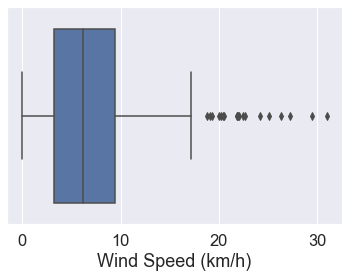

In [15]:
sns.boxplot(df["Wind Speed (km/h)"])
plt.show()

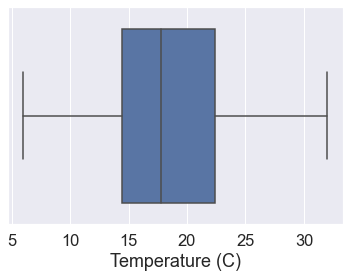

In [16]:
sns.boxplot(df["Temperature (C)"])
plt.show()

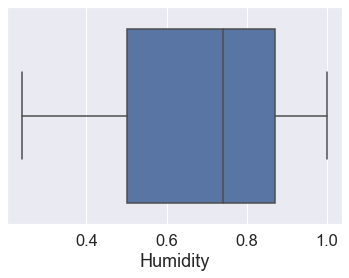

In [17]:
sns.boxplot(df["Humidity"])
plt.show()

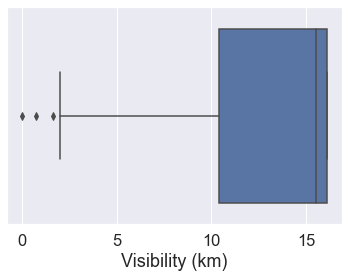

In [18]:
sns.boxplot(df["Visibility (km)"])
plt.show()

### ii. Categorical (bar chart)

# 3. Normalization and standardization

## a. Mean and variance for each of the columns

In [19]:
df_mean = pd.DataFrame(df.mean(), columns = ["Mean"])
df_var = pd.DataFrame(df.var(), columns = ["Variance"])
df_mean_var = pd.concat([df_mean, df_var], axis=1, sort=False)
df_mean_var

,Mean,Variance
Temperature (C),18.469921,37.217922
Apparent Temperature (C),18.370551,35.977549
Humidity,0.688442,0.045239
Wind Speed (km/h),6.846503,22.696876
Wind Bearing (degrees),177.278940,15462.123201
Visibility (km),13.734376,10.880870
Loud Cover,0.000000,0.000000
Pressure (millibars),1017.981389,26.506875


## b. Normalization of all the numeric columns (to make mean 0 and variance 1)

In [20]:
normalized_df = df

new_list = df.select_dtypes(include=np.number).columns.to_list() #List of numeric columns

for e in new_list :
        normalized_df[e] = (normalized_df[e] - normalized_df[e].mean())/normalized_df[e].std()
        
#Since the resulting dataset has a column, whose values do not change, we can drop it.
normalized_df = normalized_df.drop(columns = 'Loud Cover')

#Normalized_df is the normalised dataset
normalized_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2016-09-01 00:00:00.000 +0200,Clear,rain,-0.348402,-0.337790,-0.415817,-0.146155,-1.104001,0.717156,0.811620,Partly cloudy starting in the morning continui...
1,2016-09-01 01:00:00.000 +0200,Clear,rain,-0.439467,-0.430411,-0.321785,-0.156294,-0.870782,0.717156,0.790254,Partly cloudy starting in the morning continui...
2,2016-09-01 02:00:00.000 +0200,Clear,rain,-0.840153,-0.837946,0.195386,-0.754452,-0.975328,0.438949,0.751408,Partly cloudy starting in the morning continui...
3,2016-09-01 03:00:00.000 +0200,Clear,rain,-0.960358,-0.960206,0.289417,-0.761211,-1.264841,0.717156,0.749466,Partly cloudy starting in the morning continui...
4,2016-09-01 04:00:00.000 +0200,Clear,rain,-1.054155,-1.055606,0.430464,-1.437096,-1.425682,0.717156,0.749466,Partly cloudy starting in the morning continui...
...,...,...,...,...,...,...,...,...,...,...,...
715,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,1.237040,1.274750,-1.215081,0.871052,-1.176379,0.717156,-0.703390,Partly cloudy starting in the morning.
716,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,1.002092,1.035787,-0.980003,0.681804,-1.264841,0.551208,-0.548004,Partly cloudy starting in the morning.
717,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,0.585014,0.611580,-0.603879,0.448623,-1.184421,0.717156,-0.450888,Partly cloudy starting in the morning.
718,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,0.500324,0.525442,-0.415817,0.773048,-1.264841,0.717156,-0.394561,Partly cloudy starting in the morning.


## c. Reasons for the neccessity of normalization and the ways in which it affects datasets

### Why should data be normalised and standardized :

* **Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. When we want to analyse data that has more than one variables, which are measured using different scales, analysis without having a common center at zero and then scaling them down can cause bias. Variables with wider scale ranges can outweigh those which vary over a smaller range**

* **Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.**

### How does normalization affect datasets :

* **Standardization transforms a random variable to one with a mean of 0 and a standard deviation of 1.**

* **A non standardized dataset can not be analysed if the data is of different scales, so standardizing it transforms it into the above mentioned without actually disturbing the distribution of the dataset.**

* **Standardization does not affect outcomes that can be drawn from the data since it is only a transform that is performed on the dataset**

## d. Verification of the normality of data 

In [21]:
df1 = pd.DataFrame(normalized_df.mean(), columns = ["Mean"]).round(10) #Mean rounded off to 10 decimal places

df2 = pd.DataFrame(normalized_df.var(), columns = ["Variance"]) #Variance
df3 = pd.concat([df1, df2], axis=1, sort=False)

df3

,Mean,Variance
Temperature (C),-0.0,1.0
Apparent Temperature (C),-0.0,1.0
Humidity,0.0,1.0
Wind Speed (km/h),0.0,1.0
Wind Bearing (degrees),-0.0,1.0
Visibility (km),-0.0,1.0
Pressure (millibars),-0.0,1.0


**Since the mean and variance of all the numerical columns have become 0 and 1 respectively, we can conclude that our data has been sucessfully normalized.**

# 4. Hypothesis testing

### Consists of 2 types of hypotheses:
- **H0**(Null hypothesis): Is usually the sample observations result purely from chance
- **H1**(Alternate hypothesis): Is the hypothesis that sample observations are influenced by some non-random cause

### While performing the hypothesis test:
- We put the null hypothesis on trial
- We begin by assumming that H0 is true
- The random sample provides the evidence
- The hypothesis test measures the strength of disagreement between the sample and H0

## a. Research hypothesis

We need to convert the temperature to K since that is the SI unit.
Therefore add 273.15 to each unit of temperature.

We also need to convert the pressure to pascal since that's it's SI unit.  
Since the pressure is in millibars, convert it in terms of bars by dividing by 1000.  
We know that 1 bar = 10,000 Pa.  
Therefore multiply by the pressure in bar by 10,000 to obtain the pressure in terms of it's SI units.  

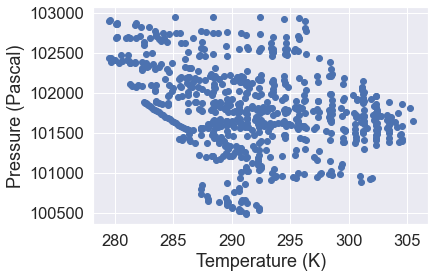

In [22]:
df4=pd.read_csv('weatherHistory.csv').interpolate()

df_temp_list=df4['Temperature (C)']
df_pressure_list=df4['Pressure (millibars)']

# converting temperature in celsius to kelvim
for i in range(len(df_temp_list)):
    df_temp_list[i]+=273.5

# converting pressure in millibar first to bar, then to pascal
for i in range(len(df_pressure_list)):
    df_pressure_list[i]*=100
    
plt.scatter(df_temp_list,df_pressure_list)
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Pascal)')
plt.show()

We know that for a closed system, temperature is directly proportional to pressure.

But the graph for the sample dataset as shown above doesn't seem to depict it. It rather approximates an inverse relationship between pressure and temperature.

### Can we prove that there is no apparent relationship between temperature and  pressure?

The general assumption here is that the temperature and pressure are directly related

### Therefore:
**H0**: The hypothesis that sample observations result purely from chance. (T is directy proportional to P, and our observations have just been resulted by chance)<br/>  
**H1**: The hypothesis that sample observations are influenced by some non-random cause. (T isn't directly proportional to P)

## b. Statistical tests

H0: **T α P** is **True**<br/>  
H1: **T α P** is **False**

Since the sample size is appreciably large enough, we can approximate it to a sample from a normal distribution. Also, since the standard deviation is also known, it's safe to say that we can use the z-table in order to perform the statistical tests.

Since the general belief is that temperature and pressure are directly related to each other, i.e. **(T α P)**

Therefore, the following equation would be true:

**(T = kP)** (where k is an arbitrary constant)

**T/P = k**

Threfore, we have to ensure that the value of k remains as constant as possible with minimum possible deviation and negligible error. It's also crucial to avoid any possible bias in order to ensure proper results.

## c. Hypothesis based on columns of our choice

Since the columns chosen are temperature and pressure, we find out their product and note down the observations.

In [23]:
l=[df_temp_list,df_pressure_list]
print(l)

[0      289.844444
1      289.288889
2      286.844444
3      286.111111
4      285.538889
          ...    
715    299.516667
716    298.083333
717    295.538889
718    295.022222
719    293.938889
Name: Temperature (C), Length: 720, dtype: float64, 0      102216.0
1      102205.0
2      102185.0
3      102184.0
4      102184.0
         ...   
715    101436.0
716    101516.0
717    101566.0
718    101595.0
719    101616.0
Name: Pressure (millibars), Length: 720, dtype: float64]


For simplicity, let's take the value of k as 1

In [24]:
k=1    # const. equated to 1 for simplification
k_val=[k*l[0][i]/l[1][i] for i in range(len(df4['Temperature (C)']))]
print(k_val)

[0.0028356073847538546, 0.0028304768738320043, 0.002807109110339091, 0.0027999599850270103, 0.0027943600650786817, 0.002794929420018984, 0.0027941438737081113, 0.002819469992466048, 0.002847116895249278, 0.0028814375605651444, 0.0029087665747353593, 0.00291985442307316, 0.002931831452687825, 0.002948630513259782, 0.002950448317478667, 0.0029536168326421775, 0.0029647755481453874, 0.002955306568325419, 0.0029500517284955993, 0.002918395076257214, 0.002880583757025847, 0.0028551243755515028, 0.0028481860476946602, 0.002839419047381008, 0.002866337791903647, 0.0028612073338844276, 0.0028620903840324394, 0.002855371168723794, 0.002855453955923895, 0.002856727190013487, 0.0028499590972085515, 0.002859141918532002, 0.002875512176394191, 0.002908488694279109, 0.0029359395596828455, 0.0029621612165699105, 0.002975813655471694, 0.002997990656618856, 0.0029867278419943685, 0.0029784294031981722, 0.002979106470547675, 0.002967395587076438, 0.0029677868526418456, 0.0029405968884553615, 0.002924500

In [25]:
df5=pd.DataFrame(k_val)
mu=df5.mean()
sigma=math.sqrt(df5.var())
print('Mean: ', mu)
print('Standard Deviation: ', sigma) 

Mean:  0    0.002868
dtype: float64
Standard Deviation:  6.569896069161947e-05


We know that the average of the ratio of standard temperature(273.15 K) and standard pressure(10,000 bar) is a constant i.e. 0.0027315 

Using z-score to standardize the data:
We obtained the mean of the ratio as 0.002868
We obtained the standard deviation of the ratio as 6.569896069161947e-05

Therefore,

**x = 0.002868    
μ = 0.0027315  
σ = 6.569896069161947e-05**

Therefore, the z-score is as follows:

**z = ( x - μ ) / σ**

In [26]:
x=mu
mu=0.0027315
z_score=(x-mu)/sigma
print(z_score)

0    2.083233
dtype: float64


In [27]:
# multiplication by 2 since it's 2-sided distribution
# since it's either equal to or not equal to the constant
# therefore, the P-value is the sum of the 2 areas on the extreme ends of the distribution
p_value = stats.norm.sf(abs(z_score))*2
print('P-Value: ',end='')
for i in p_value:
    print(i)

P-Value: 0.037230017587033724


## d. Decision on whether the null hypothesis is supported or rejected

### 5% statistical significance
Since P-Value is less than 0.05, (taking at 5% statistical signigicance), we reject H0, the original hypothesis, and accept our claim that there is no specific relationship between temperature and pressure to be plausible
_______________________________________________________________________________________________________________________________
    
   But, we know that pressure is directly proportional to temperature only at constant volume. We also know that the volume doesn't always remain constant. The change in volume to most extent would be practically significant. But the changes at times are definitely statistically significant. That's the main reason why we the null hypothesis was rejected by taking 5% statistical significance.

   Therefore, a better solution is to increase the level of accuracy and bring the level of statistical significance down to 1%, which obviously seems to be a better choice in this scenario.
_______________________________________________________________________________________________________________________________

### 1% statistical significance
So, since P-value is greater than 0.01, (taking at 1% statistical signigicance), we do not reject H0, the original hypothesis, and continue with the accepted fact i.e. the null hypothesis

### Therefore, we can confidently conclude that the null hypothesis is supported.

# 5. Correlation

## a. Correlation b/w variables that are positively and negatively related

In [28]:
df=pd.read_csv('weatherHistory.csv').drop(columns='Loud Cover')
df=df.interpolate()

**Correlation Table**

In [29]:
correlation_df=df.corr()
correlation_df
correlation_df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.998718,-0.820016,0.310708,-0.102308,0.147323,-0.299430
Apparent Temperature (C),0.998718,1.000000,-0.813411,0.304023,-0.105036,0.143475,-0.304001
Humidity,-0.820016,-0.813411,1.000000,-0.257865,0.074471,-0.302731,-0.083958
Wind Speed (km/h),0.310708,0.304023,-0.257865,1.000000,0.049136,-0.162688,-0.319504
Wind Bearing (degrees),-0.102308,-0.105036,0.074471,0.049136,1.000000,-0.038022,-0.050841
Visibility (km),0.147323,0.143475,-0.302731,-0.162688,-0.038022,1.000000,0.205806
Pressure (millibars),-0.299430,-0.304001,-0.083958,-0.319504,-0.050841,0.205806,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

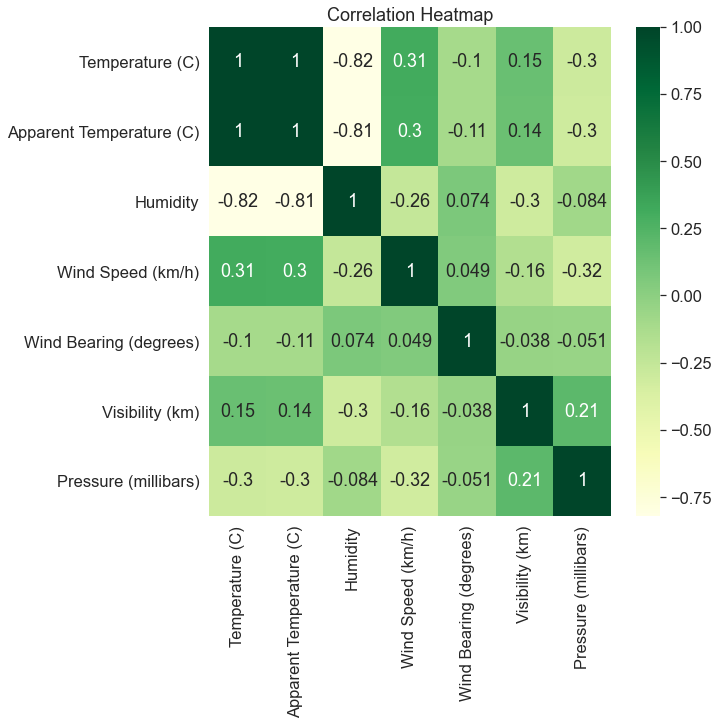

In [30]:
fig = plt.figure(figsize=(9,9))
r = sns.heatmap(correlation_df,annot=True,cmap='YlGn')
r.set_title("Correlation Heatmap")

**With the help of the above tablular and graphical data, we can state the correlation between the variables that are positively and negatively correlated.**

## b. Inferences

**With the assistance of data and results proved above, we obtain various inferences on the nature of the dataset as mentioned below:**

- Most of the days were rainy and cloudy in nature since the observations in the dataset have been from the month of September, during which monsoon/rainy season is prevalent in most parts of the Northern Hemisphere in and around the Tropic of Cancer.

- We can also easily infer and predict the weather in the forecoming couple of months, using the given statistics to find the parameters. 

- We can also predict the weather in the similar months in the upcoming few years, but at the same time, we would also need to take into account the rising rate of various environmental effects like greenhouse effect leading to global warming thereby leading to imbalanced seasons which result in excess drouughts and floods. The average temperature of the earth is also rising slowly but steadily.

- So, it wouldn't be wrong to say that the inferences and predictions made in the future i.e. after 5 years and more... wouldn't be plausible as they are for the near future, thereby leading to an increase in the degree of uncertainity and many more assumptions and null hypotheses being rejected. 

- But, we can predict the weather to some extent in general even in the upcoming years, just that the degree of uncertainity would be witnessing an exponential rise.

- So, take care of the environment as well :)

_______________________________________________________________________________________________________________________________
###                                                                        THE END
_______________________________________________________________________________________________________________________________                                         